# Bellabeat: How Can A Wellness Technology Company Play It Smart?

### Business Task


##### Analyze FitBit Fitness Tracker Data to gain insights into how consumers are using the FitBit app and discover trends and insights for Bellabeat marketing strategy.





###  Business Objectives

##### 1- What are the trends identified?
##### 2- How could these trends apply to Bellabeat customers?
##### 3 - How could these trends help influence Bellabeat marketing strategy?


<br/>

## PREPARE THE DATA 

#### Information on Data Source

 The data is publicly available on Kaggle: FitBit Fitness Tracker Data and stored in 18 csv files.

 Generated by respondents from a distributed survey via Amazon Mechanical Turk between 12 March 2016 to 12 May 2016.

30 FitBit users who consented to the submission of personal tracker data.

Data collected includes (1) physical activity recorded in minutes, (2) heart rate, (3) sleep monitoring, (4) daily activity and (5) steps.


#### Limitations of Data Set

Data collected from year 2016. Users' daily activity, fitness and sleeping habits, diet and food consumption may have changed since then, hence data may not be timely or relevant.

Sample size of 30 female FitBit users is not representative of the entire female population.
    
As data is collected in a survey, hence unable to ascertain the integrity or accuracy of data.


## PROCESS THE DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [2]:
# let's load the data
df = pd.read_csv('dailyActivity_merged.csv')


In [3]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
# let's check the data types
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

as we can see the ActivityDate column is an object but we need to convert it to a date

In [7]:
# convert activityDate to datetime with fromat %m/%d/%Y
df.ActivityDate = pd.to_datetime(df.ActivityDate, format="%m/%d/%Y")


In [8]:
df.ActivityDate.head()

0   2016-04-12
1   2016-04-13
2   2016-04-14
3   2016-04-15
4   2016-04-16
Name: ActivityDate, dtype: datetime64[ns]

In [9]:
# let's check for null values
df.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [18]:
# let's get the count of unique id of the users
unique_users =  len(df.Id.unique())

unique_users

33

so we have 33 users not 30 as exepected

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [22]:
# let's add new cloumn have the day name
df['DayOfWeek'] = df.ActivityDate.dt.day_name()

In [23]:
df['DayOfWeek'].head()

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: DayOfWeek, dtype: object

In [24]:
# and also the month name
df['Month'] = df.ActivityDate.dt.month_name()

In [25]:
df['Month'].head()

0    April
1    April
2    April
3    April
4    April
Name: Month, dtype: object

In [26]:
# and also the year
df['Year'] = df.ActivityDate.dt.year

In [27]:
df['Year'].head()

0    2016
1    2016
2    2016
3    2016
4    2016
Name: Year, dtype: int64

In [28]:
df[4:10]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,Month,Year
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,April,2016
5,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,Sunday,April,2016
6,1503960366,2016-04-18,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921,Monday,April,2016
7,1503960366,2016-04-19,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035,Tuesday,April,2016
8,1503960366,2016-04-20,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786,Wednesday,April,2016
9,1503960366,2016-04-21,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775,Thursday,April,2016


In [30]:
# let's get the total mins 
df['TotalMins'] = df["VeryActiveMinutes"] + df["FairlyActiveMinutes"] + df["LightlyActiveMinutes"] + df["SedentaryMinutes"]


In [31]:
df['TotalMins'].head()

0    1094
1    1033
2    1440
3     998
4    1040
Name: TotalMins, dtype: int64

In [34]:
# now let's get the total hours
df['TotalHours'] = round(df['TotalMins']/60)

In [35]:
df['TotalHours'].head()

0    18.0
1    17.0
2    24.0
3    17.0
4    17.0
Name: TotalHours, dtype: float64

<AxesSubplot:>

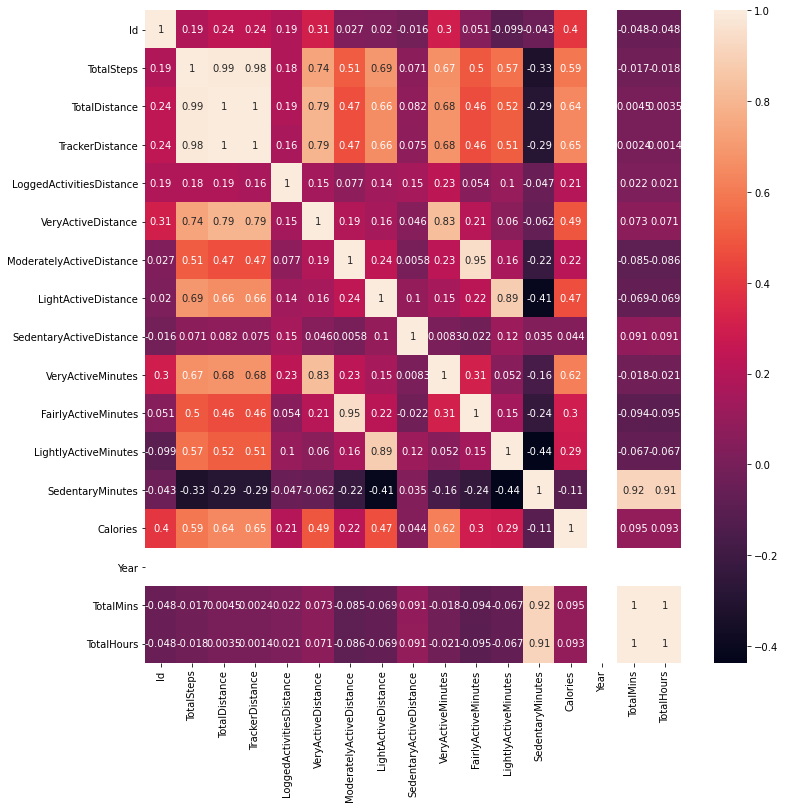

In [42]:
# let's see the correlation between the variables as a heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)


In [43]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,Month,Year,TotalMins,TotalHours
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,April,2016,1094,18.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,April,2016,1033,17.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,April,2016,1440,24.0
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,April,2016,998,17.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,April,2016,1040,17.0


In [44]:
df.describe( )

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Year,TotalMins,TotalHours
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.0,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,2016.0,1218.753191,20.313830
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,0.0,265.931767,4.437283
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,2.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,2016.0,989.750000,16.000000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,2016.0,1440.000000,24.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,2016.0,1440.000000,24.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,2016.0,1440.000000,24.000000


Interpreting statistical findings:

On average, users logged 7,637 steps or 5.4km which is not adequate. As recommended by CDC, an adult female has to aim at least 10,000 steps or 8km per day to benefit from general health, weight loss and fitness improvement. Source: Medical News Today article


Sedentary users are the majority logging on average 991 minutes or 20 hours making up 81% of total average minutes.


Noting that average calories burned is 2,303 calories equivalent to 0.6 pound. Could not interpret into detail as calories burned depend on several factors such as the age, weight, daily tasks, exercise, hormones and daily calorie intake. Source: Health Line article


## Share our finding

In [45]:
# let's see the number of times user logged in acrross the week
df.groupby('DayOfWeek').TotalHours.mean()

DayOfWeek
Friday       20.619048
Monday       20.975000
Saturday     20.169355
Sunday       19.975207
Thursday     19.659864
Tuesday      20.664474
Wednesday    20.206667
Name: TotalHours, dtype: float64

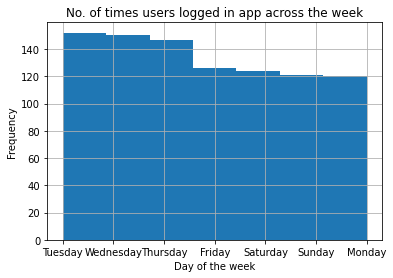

In [48]:
# let's see the number of times user logged in acrross the week as a histogram
plt.hist(df['DayOfWeek'], bins = 7)
# adding annotations and visuals
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app across the week")
plt.grid(True)


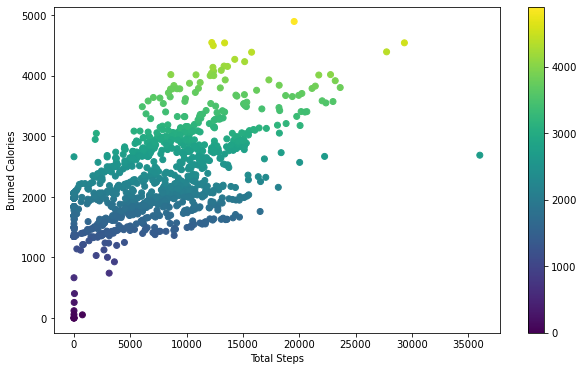

In [62]:
# let's see the burned calories for every setp taken as scatter plot

plt.figure(figsize=(10,6))
plt.scatter(df['TotalSteps'], df['Calories'],c = df['Calories'])
plt.xlabel("Total Steps")
plt.ylabel("Burned Calories")
plt.colorbar()


#### From the scatter plot, we discovered that:

It is a positive correlation.

    We observed that intensity of calories burned increase when users are at the range of > 0 to 15,000 steps with calories burn rate cooling down from 15,000 steps onwards.

Noted a few outliers:
    Zero steps with zero to minimal calories burned.

    1 observation of > 35,000 steps with < 3,000 calories burned.
    
    2-Deduced that outliers could be due to natural variation of data, change in user's usage or errors in data collection (ie. miscalculations, data contamination or human error).


In [63]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,Month,Year,TotalMins,TotalHours
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,April,2016,1094,18.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,April,2016,1033,17.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,April,2016,1440,24.0
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,April,2016,998,17.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,April,2016,1040,17.0


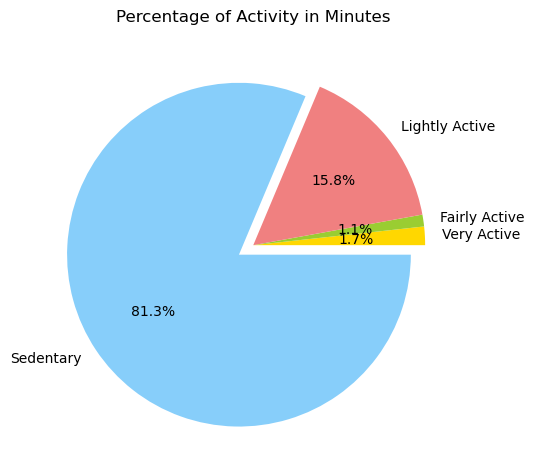

In [68]:
# let's see the precentage of activity in minutes

very_active_mins = df["VeryActiveMinutes"].sum()
fairly_active_mins = df["FairlyActiveMinutes"].sum()
lightly_active_mins = df["LightlyActiveMinutes"].sum()
sedentary_mins = df["SedentaryMinutes"].sum()
plt.style.use("default")
# ploting a pie chart
labels = ['Very Active', 'Fairly Active', 'Lightly Active', 'Sedentary']
sizes = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0, 0.1)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()

As seen from the pie chart,

    Sedentary minutes takes the biggest slice at 81.3%.

    This indicates that users are using the FitBit app to log daily activities such as daily commute, inactive movements (moving from one spot to another) or running errands.

    App is rarely being used to track fitness (ie. running) as per the minor percentage of fairly active activity (1.1%) and very active activity (1.7%). This is highly discouraging as FitBit app was developed to encourage fitness.
